# Step 1 - Load the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\DeLL\Documents\Data Science\Advanced AI\NLP(DL Approach)\28th July\full_economic_news_articles.csv", encoding = 'latin1')
df.head()

,relevance,articleid,date,headline,text
0,yes,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,no,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,no,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,no,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,yes,wsj_398838054,10-04-2002,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


# Step 2 - Exploratory Data Analysis

In [5]:
df.shape

(8000, 5)

In [6]:
# Relavant Articles - Talking about Economy
df.loc[0,'text']

'NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday\'s auction plummeted more than a fifth of a percentage po

In [8]:
# Non - Relavant Articles - Not Talking about Economy - Seems to be talking about child health insurance
df.loc[1,'text']

'The Wall Street Journal Online</br></br>The Morning Brief, a look at the day\'s biggest news, is emailed to subscribers by 7 a.m. every business day. Sign up for the e-mail here.</br></br>On Friday evening, with Congress out of town on its summer recess and Americans heading into a mid-August weekend, the Bush administration sent a message to the states: The federal government will make it tougher for a national children\'s insurance program to cover the offspring of middle-income families.</br></br>The State Children\'s Health Insurance Program was created in 1997 to help children whose families couldn\'t afford insurance but didn\'t qualify for Medicaid, and administration officials tell the New York Times that the changes are aimed at returning the program to its low- income focus and assuring it didn\'t become a replacement for private insurance. Administration point man Dennis Smith wrote to state officials saying there would be new restrictions on the District of Columbia and th

In [12]:
# Distribution on target variable looks non-uniform
df['relevance'].value_counts(normalize = True)*100

relevance
no          82.1375
yes         17.7500
not sure     0.1125
Name: proportion, dtype: float64

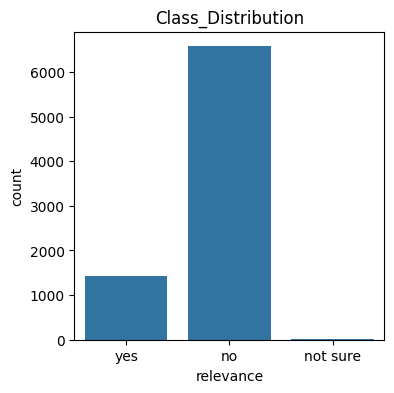

In [14]:
fig, ax = plt.subplots(figsize = (4,4))
ax.set_title('Class_Distribution')
sns.countplot(data = df, x = 'relevance')
plt.show()

In [15]:
# Visualizing the distribution of most frequent words
from collections import Counter

# Get all words in the text
all_words = ' '.join(df['text'].values).split()
word_count = Counter(all_words)

In [16]:
word_count

Counter({'the': 99273,
         'of': 48612,
         'to': 46247,
         'a': 37720,
         'in': 36352,
         'and': 35467,
         'that': 19236,
         'for': 16602,
         'is': 13784,
         'on': 12211,
         'as': 10450,
         'at': 9784,
         'by': 9413,
         'from': 8678,
         'The': 8640,
         'with': 8300,
         'was': 8221,
         'are': 7820,
         'it': 7028,
         'have': 6858,
         'has': 6770,
         'be': 6739,
         'said': 6667,
         'its': 6354,
         'an': 6133,
         'will': 5563,
         'more': 5416,
         'or': 5082,
         'than': 4980,
         'this': 4747,
         'U.S.': 4710,
         '--': 4695,
         'their': 4566,
         'would': 4421,
         'which': 4410,
         'about': 4319,
         'market': 4199,
         'up': 4088,
         'were': 3889,
         'they': 3810,
         'but': 3667,
         'he': 3657,
         'not': 3648,
         'last': 3504,
         'econ

In [17]:
# Get the most common words

common_words = word_count.most_common(20)

In [18]:
common_words

[('the', 99273),
 ('of', 48612),
 ('to', 46247),
 ('a', 37720),
 ('in', 36352),
 ('and', 35467),
 ('that', 19236),
 ('for', 16602),
 ('is', 13784),
 ('on', 12211),
 ('as', 10450),
 ('at', 9784),
 ('by', 9413),
 ('from', 8678),
 ('The', 8640),
 ('with', 8300),
 ('was', 8221),
 ('are', 7820),
 ('it', 7028),
 ('have', 6858)]

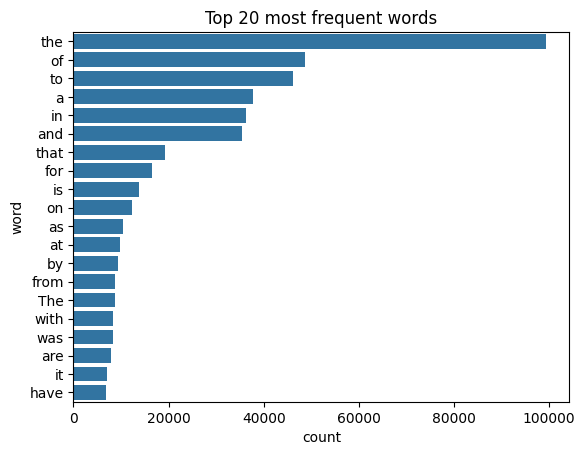

In [20]:
# Convert to data frame for plotting

common_words_df = pd.DataFrame(common_words, columns = ['word', 'count'])

#Plot the most common words

sns.barplot(common_words_df, x = 'count', y = 'word')
plt.title('Top 20 most frequent words')
plt.show()

In [25]:
# Visualizing an overall word cloud from the given data

from wordcloud import WordCloud
wc = WordCloud(background_color = 'black', width = 1600, height = 800).generate(' '.join(df['text'].values))

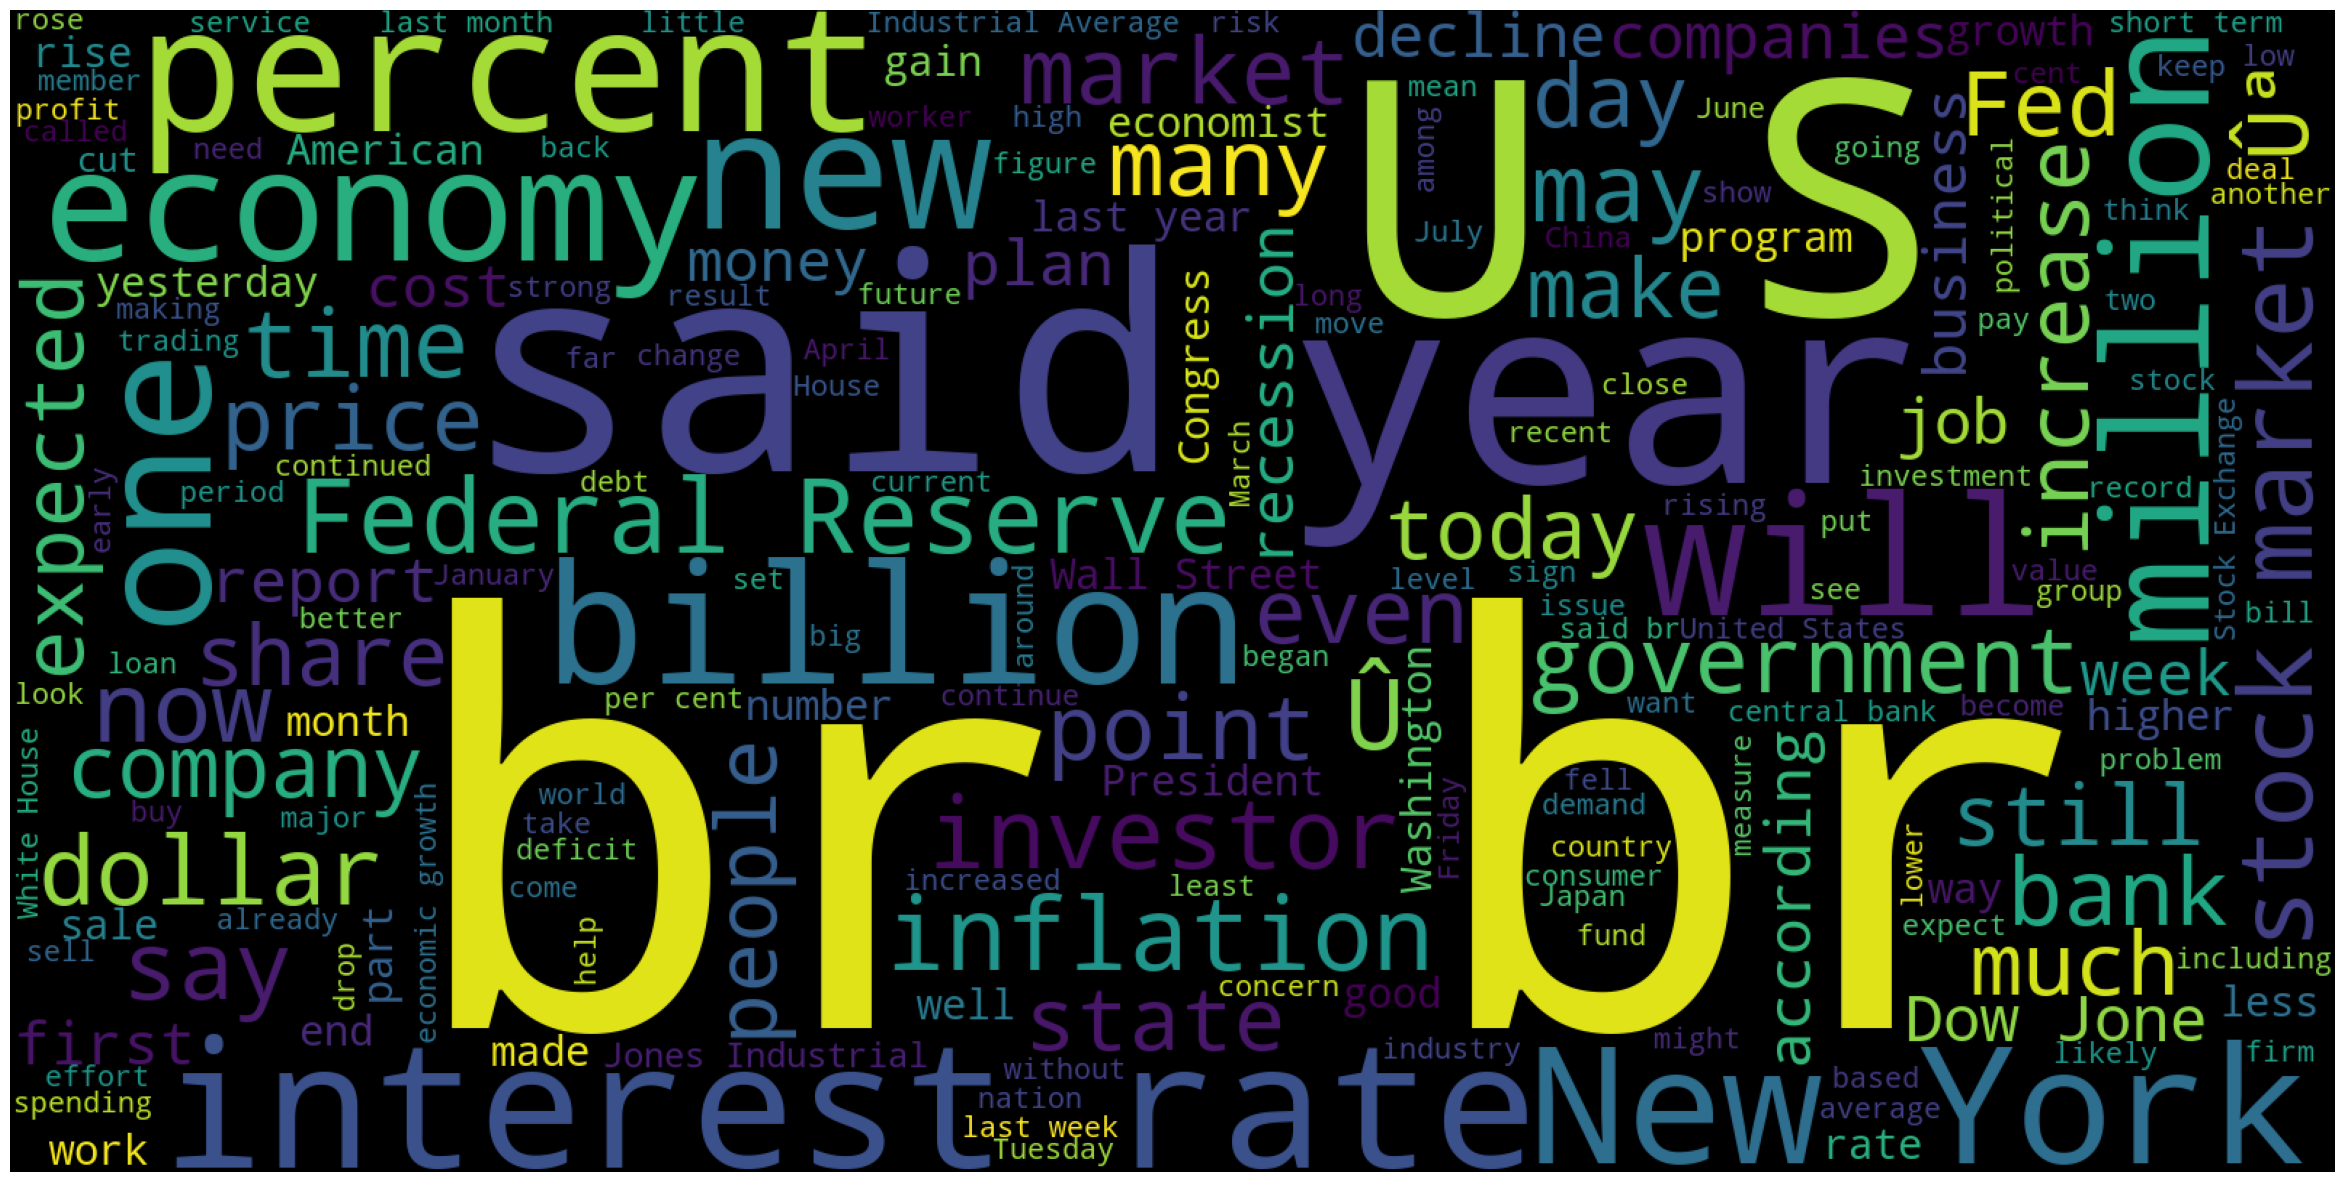

In [26]:
plt.figure(1, figsize = (30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [36]:
# Removing the data where we dont want relevance = not sure

df = df[df['relevance'] != 'not sure']

In [37]:
df['relevance'].value_counts()

relevance
no     6571
yes    1420
Name: count, dtype: int64

In [38]:
# Convert label to a numeric value

df['relevance'] = np.where(df['relevance'] == 'yes', 1, 0)

C:\Users\DeLL\AppData\Local\Temp\ipykernel_16268\2020900951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relevance'] = np.where(df['relevance'] == 'yes', 1, 0)


In [39]:
df['relevance'].value_counts()

relevance
0    6571
1    1420
Name: count, dtype: int64

In [40]:
# Let us take only two columns that we need

df = df[['text', 'relevance']]
df.shape

(7991, 2)

In [41]:
df.head()

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,1
1,The Wall Street Journal Online</br></br>The Mo...,0
2,WASHINGTON -- In an effort to achieve banking ...,0
3,The statistics on the enormous costs of employ...,0
4,NEW YORK -- Indecision marked the dollar's ton...,1


# Step 3 : Seggregate inputs (x) and outputs (y)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x = df.text
y = df.relevance
print(x.shape, y.shape)

(7991,) (7991,)


# Step 4 split the data into train and test

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, stratify = y)

In [45]:
y_train.value_counts()

relevance
0    4928
1    1065
Name: count, dtype: int64

In [46]:
y_test.value_counts()

relevance
0    1643
1     355
Name: count, dtype: int64

# Step 5 : Applying data preparation on training dataset

In [56]:
# preprocessing on training data
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [57]:
def clean(doc):
    doc = doc.replace('</br>', ' ')
    doc = ''.join([char for char in doc if not char in string.punctuation and not char.isdigit()]) # Removes punctuations and numbers
    tokens = nltk.word_tokenize(doc)
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    filtered_tokens = [word for word in lemma_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [58]:
# import feature extraction methods from sklearn

# BOW
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# convert into vectorizer

vector = CountVectorizer(preprocessor = clean)

# use it to extract features from training data

%time x_train_dtm = vector.fit_transform(x_train)

print(f'shape of x_train_transformed (# of docs, # of unique vocabulary) : {x_train_dtm.shape}')
print(f'Type of x_train_transformed (i;e., compressed sparsed row (CSR) format : {type(x_train_dtm)}')
print(f'Vocabulary leaned : {vector.get_feature_names_out()[:10]}')

CPU times: total: 16.6 s
Wall time: 17.1 s
shape of x_train_transformed (# of docs, # of unique vocabulary) : (5993, 46355)
Type of x_train_transformed (i;e., compressed sparsed row (CSR) format : <class 'scipy.sparse._csr.csr_matrix'>
Vocabulary leaned : ['AA' 'AAA' 'AACER' 'AARONS' 'AARP' 'AAdvantage' 'AAirl' 'AAlrl' 'AB'
 'ABA']


In [62]:
def tokenizer(doc):
    return nltk.word_tokenize(doc)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
bow_vector = CountVectorizer(token_pattern = None, stop_words = None, preprocessor = clean, tokenizer = tokenizer, ngram_range = (1,1))
%time x_train_transformed = bow_vector.fit_transform(x_train)
print()
print(f'shape of x_train_transformed (# of docs, # of unique vocabulary) : {x_train_transformed.shape}')
print(f'Type of x_train_transformed (i;e., compressed sparsed row (CSR) format : {type(x_train_transformed)}')
print(f'Vocabulary leaned : {bow_vector.get_feature_names_out()[:10]}')


CPU times: total: 18.7 s
Wall time: 18.8 s

shape of x_train_transformed (# of docs, # of unique vocabulary) : (5993, 48401)
Type of x_train_transformed (i;e., compressed sparsed row (CSR) format : <class 'scipy.sparse._csr.csr_matrix'>
Vocabulary leaned : ['AA' 'AAA' 'AACER' 'AARONS' 'AARP' 'AAdvantage' 'AAirl' 'AAlrl' 'AB'
 'ABA']


In [64]:
x_test_transformed = bow_vector.transform(x_test)
print(x_test_transformed.shape)

(1998, 26152)


In [65]:
x_test_dtm = vector.transform(x_test)
print(x_test_dtm.shape)

(1998, 46355)


# Building a Model

In [67]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

%time nb.fit(x_train_dtm, y_train)

CPU times: total: 31.2 ms
Wall time: 33 ms


MultinomialNB()

In [69]:
# evaluate the train data

from sklearn import metrics

y_train_pred = nb.predict(x_train_dtm)
metrics.confusion_matrix(y_train, y_train_pred)

array([[4234,  694],
       [ 264,  801]], dtype=int64)

In [70]:
metrics.accuracy_score(y_train, y_train_pred)

0.8401468379776406

In [71]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      4928
           1       0.54      0.75      0.63      1065

    accuracy                           0.84      5993
   macro avg       0.74      0.81      0.76      5993
weighted avg       0.87      0.84      0.85      5993



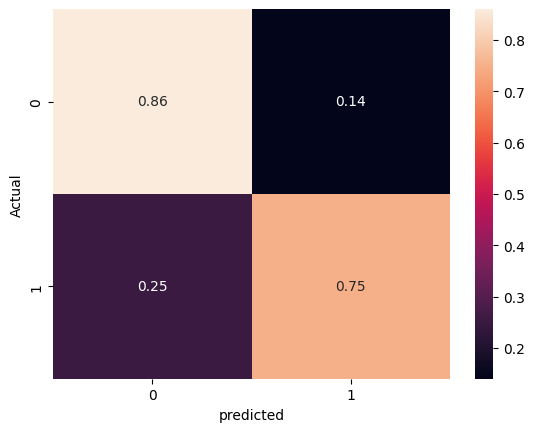

In [76]:
cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis = 1).reshape(-1,1)
cmn = np.round(cm/actual, 2)
sns.heatmap(cmn, annot = True, fmt = '.2f', xticklabels = nb.classes_, yticklabels = nb.classes_)
plt.ylabel('Actual')
plt.xlabel('predicted')
plt.show()

In [86]:
# Evaluate on test data

In [88]:
y_test_pred = nb.predict(x_test_dtm)

In [90]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

array([[1391,  252],
       [ 196,  159]], dtype=int64)

In [91]:
print(metrics.accuracy_score(y_test, y_test_pred))

0.7757757757757757


In [92]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1643
           1       0.39      0.45      0.42       355

    accuracy                           0.78      1998
   macro avg       0.63      0.65      0.64      1998
weighted avg       0.79      0.78      0.78      1998



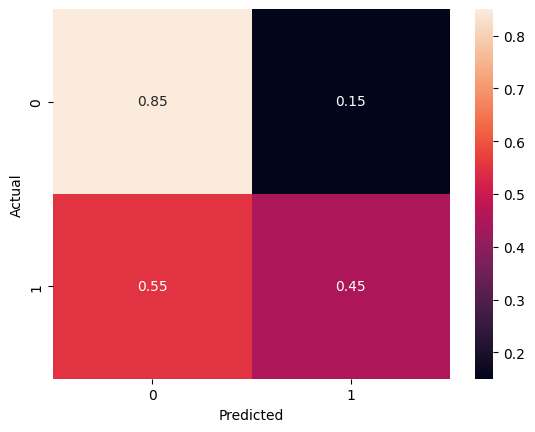

In [95]:
actual = np.sum(cm, axis = 1).reshape(-1,1)
cmn = np.round(cm/actual, 2)
sns.heatmap(cmn, annot = True, fmt = '.2f', xticklabels = nb.classes_, yticklabels = nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [96]:
# accuracy is coming not very good